In [1]:
import pandas as pd
import numpy as np

In [2]:
chrn = pd.read_csv("C:\\Users\SAIRAM YERRAMSETTI\Documents\data sets\Churn.csv")

In [3]:
chrn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
chrn.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'State', 'Area Code',
       'Phone'],
      dtype='object')

In [5]:
## dropping the columns which are not required
chrn = chrn.drop(['State', 'Area Code',
       'Phone'], axis = 1)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [7]:
target= chrn["Churn"]
chrn = chrn.drop(["Churn"],axis = 1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(chrn, target, test_size = 0.2, random_state = 42)

In [9]:
#decision tree on churn data
import sklearn
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 20, random_state=1234)

In [11]:
# help(dt)

In [12]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [13]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [14]:
##model Visualization
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\SAIRAM YERRAMSETTI\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


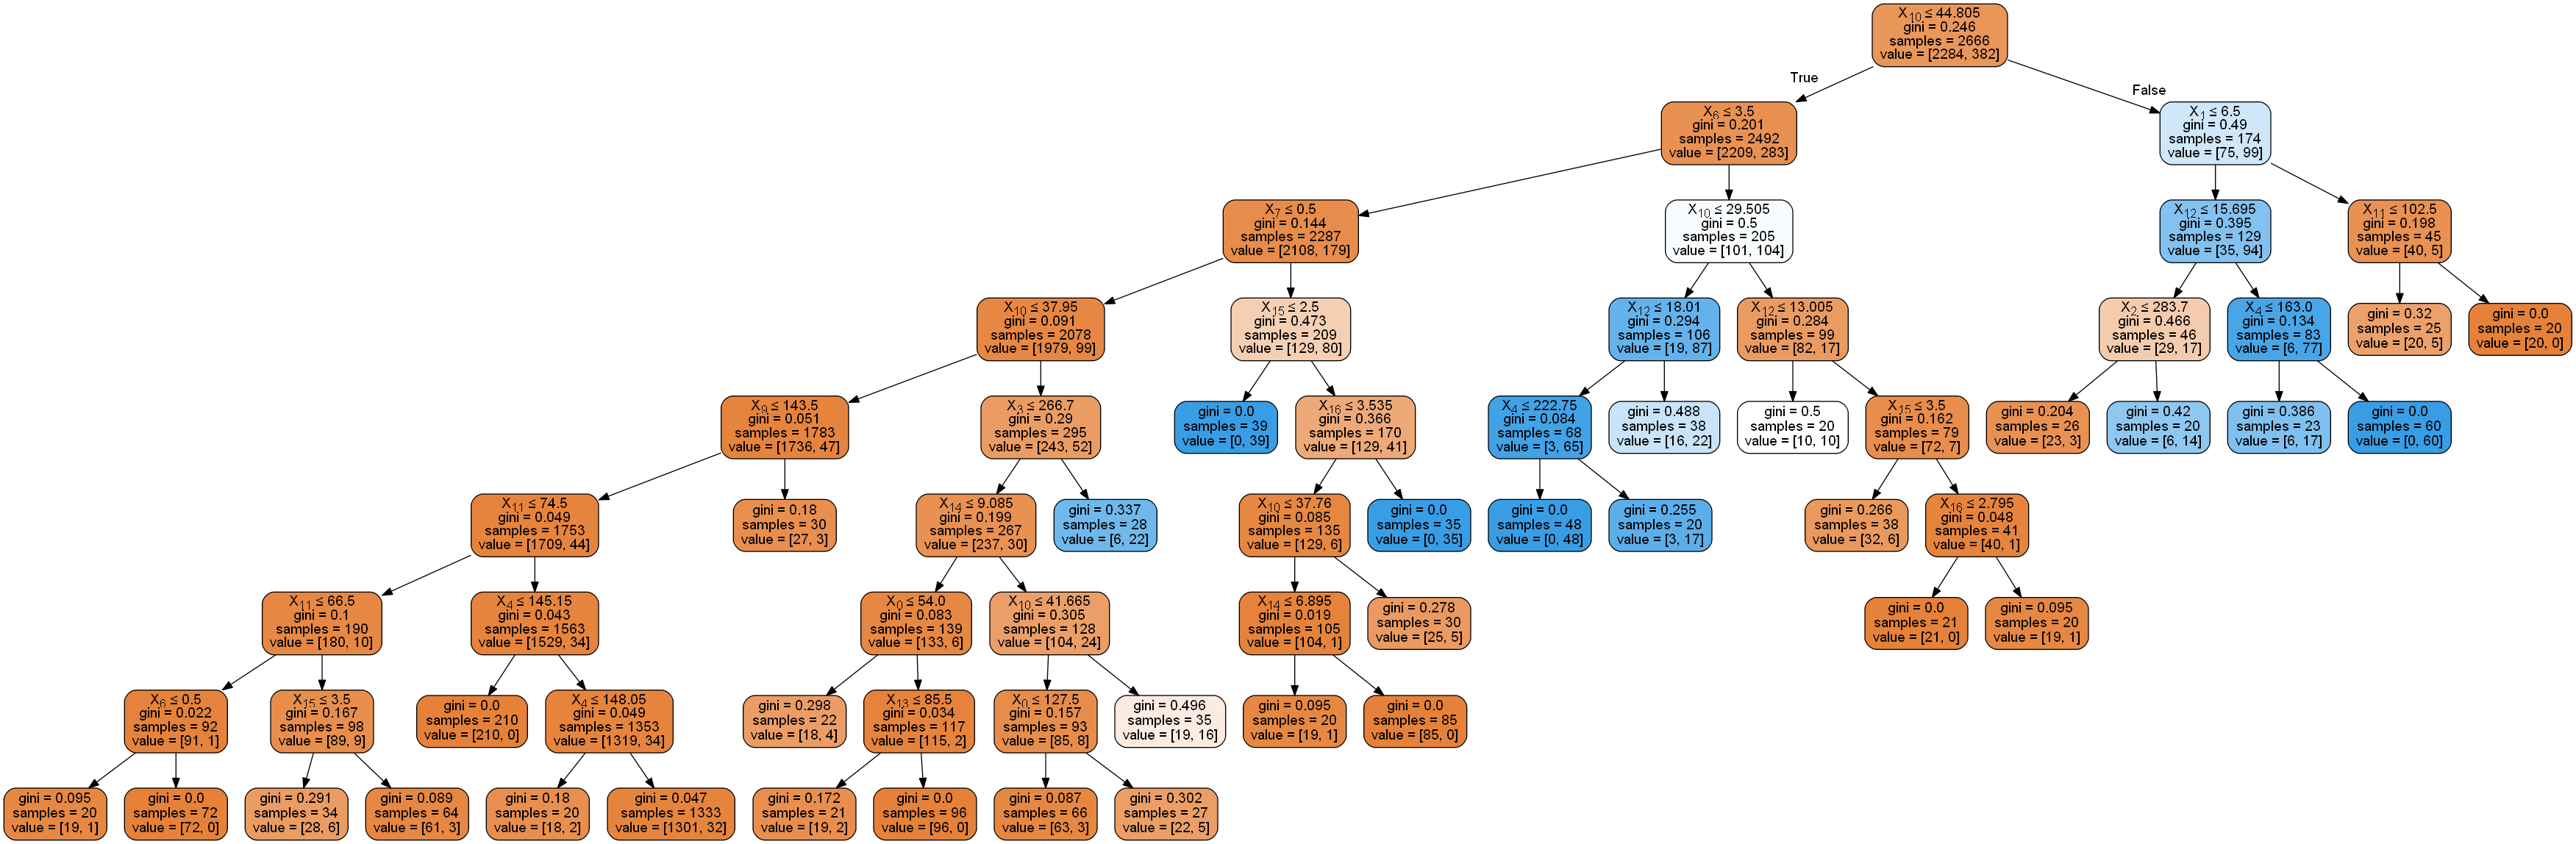

In [15]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
##prediction 
pred = dt.predict(x_test)
    

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[551,  15],
       [ 31,  70]], dtype=int64)

In [18]:
#accuracy = tp/tp+tn
a = 551 / (551+70)
a*100

88.72785829307568

In [19]:
#precision = tp/ (tp+fp)
p = 551 / (551+31)
p*100

94.67353951890034

In [20]:
#recall = tp/ (tp+fn)
r = 551 / (551+15)
r*100

97.34982332155478

###### random forest classifier

In [21]:
rf = RandomForestClassifier()

In [22]:
rf = RandomForestClassifier(n_estimators = 50, criterion='entropy', max_features= 5, class_weight='balanced', max_depth = 7, random_state=123)

In [23]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=7, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [24]:
y_pred = rf.predict(x_test)

In [25]:
confusion_matrix(y_test,y_pred)

array([[550,  16],
       [ 20,  81]], dtype=int64)

In [26]:
550/(550+81)

0.8716323296354992

In [27]:
pr=550/(550+20)
pr*100

96.49122807017544

In [28]:
re=550/(550+16)
re*100

97.1731448763251

In [29]:
f1 = 2*pr*re/(pr+re)
f1

0.9683098591549295

In [30]:
from sklearn.metrics import classification_report

In [31]:
classification_report(y_test,y_pred,output_dict=False) #as we are dealing with the churn prediction we must consider the "0" prediction values.

'              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.97       566\n           1       0.84      0.80      0.82       101\n\n    accuracy                           0.95       667\n   macro avg       0.90      0.89      0.89       667\nweighted avg       0.95      0.95      0.95       667\n'

In [32]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.9460269865067467

In [33]:
##variable importance of randomforest model
rf.feature_importances_

array([0.01776033, 0.02551338, 0.17913378, 0.05664346, 0.02989193,
       0.03857749, 0.18498178, 0.12710552, 0.02448355, 0.02179209,
       0.11588479, 0.01367217, 0.05025198, 0.01745951, 0.0258234 ,
       0.03847034, 0.03255451])

In [34]:
##sorting variables on the importances
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_, index = x_train.columns, columns = ["importance"]).sort_values("importance",ascending=False)
feature_importances

,importance
CustServ Calls,0.184982
Day Mins,0.179134
Intl Plan,0.127106
Day Charge,0.115885
Eve Mins,0.056643
Eve Charge,0.050252
Intl Mins,0.038577
Intl Calls,0.038470
Intl Charge,0.032555
Night Mins,0.029892


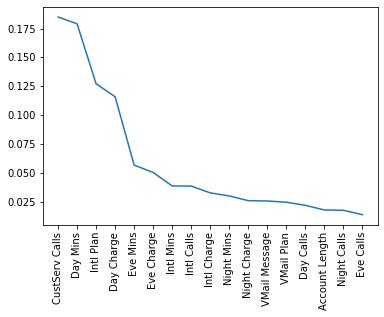

In [35]:
import matplotlib.pyplot as plt
plt.plot(feature_importances)
plt.xticks(rotation=90)
plt.show()

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
## grid parameters for grid search
param_grid = {
    'max_depth':[6,7,8],
    'n_estimators':[10,20,30],
    'max_features':[4,5,6]
}

In [38]:
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
#instantiating the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs=-1, verbose=2)

In [39]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    5.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [40]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 5, 'n_estimators': 20}

In [41]:
grid_search.cv_results_

{'mean_fit_time': array([0.06382418, 0.13025303, 0.17399321, 0.06713123, 0.12366753,
        0.20265794, 0.12287102, 0.18949275, 0.25583925, 0.05957379,
        0.12187719, 0.17632008, 0.0714066 , 0.13164902, 0.19049087,
        0.07579718, 0.14700074, 0.21263218, 0.06243248, 0.1398242 ,
        0.20744462, 0.08019061, 0.17812204, 0.27446241, 0.1318469 ,
        0.18091578, 0.2315784 ]),
 'std_fit_time': array([0.00639484, 0.01164253, 0.00813077, 0.00456456, 0.01051702,
        0.02347748, 0.02608773, 0.01489972, 0.03042311, 0.00221056,
        0.00501647, 0.0052948 , 0.00325521, 0.0095864 , 0.006712  ,
        0.00578353, 0.00325335, 0.00602933, 0.00232628, 0.01179038,
        0.00746296, 0.00469752, 0.03041822, 0.02047772, 0.02924343,
        0.00955793, 0.01958814]),
 'mean_score_time': array([0.00439296, 0.00659165, 0.00773582, 0.00498676, 0.00558438,
        0.00777874, 0.00478573, 0.00618339, 0.0069808 , 0.00319204,
        0.0057806 , 0.00797849, 0.00418859, 0.00618024, 0.007772

In [42]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%'.format(accuracy))
    return accuracy

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

Model Performance
Accuracy = 0.95%


In [45]:
confusion_matrix(y_test,y_pred)

array([[550,  16],
       [ 20,  81]], dtype=int64)

In [46]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.97       566\n           1       0.84      0.80      0.82       101\n\n    accuracy                           0.95       667\n   macro avg       0.90      0.89      0.89       667\nweighted avg       0.95      0.95      0.95       667\n'